<a href="https://colab.research.google.com/github/jbEmanuel/German_Credit_Risk_Classification/blob/main/German_Credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Description

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import RobustScaler


In [ ]:
description = pd.read_csv('/content/DataDescription.csv')
description.head(21)

,Column Name,Variable Name,Content
0,laufkont,status,status of the debtor's checking account with t...
1,laufzeit,duration,credit duration in months (quantitative)
2,moral,credit_history,history of compliance with previous or concurr...
3,verw,purpose,purpose for which the credit is needed (catego...
4,hoehe,amount,credit amount in DM (quantitative; result of m...
5,sparkont,savings,debtor's savings (categorical)
6,beszeit,employment_duration,duration of debtor's employment with current e...
7,rate,installment_rate,credit installments as a percentage of debtor'...
8,famges,personal_status_sex,combined information on sex and marital status...
9,buerge,other_debtors,Is there another debtor or a guarantor for the...


# 1. Gathering the Dataset

In [2]:
colunas = ['id', 'status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk']

In [3]:
data = pd.read_csv('/content/train.csv')
data.columns = colunas
data.head()

,id,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,5,1,10,4,0,2241,1,2,1,3,1,3,1,48,3,1,2,2,1,1,1,1


# 1 Exploratory Data Analysis

In [4]:
df = data.copy()
df.drop(["id"], axis = 1, inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   800 non-null    int64
 1   duration                 800 non-null    int64
 2   credit_history           800 non-null    int64
 3   purpose                  800 non-null    int64
 4   amount                   800 non-null    int64
 5   savings                  800 non-null    int64
 6   employment_duration      800 non-null    int64
 7   installment_rate         800 non-null    int64
 8   personal_status_sex      800 non-null    int64
 9   other_debtors            800 non-null    int64
 10  present_residence        800 non-null    int64
 11  property                 800 non-null    int64
 12  age                      800 non-null    int64
 13  other_installment_plans  800 non-null    int64
 14  housing                  800 non-null    int64
 15  number

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
status,800.0,2.64875,1.250931,1.0,1.75,2.0,4.00,4.0
duration,800.0,20.49625,12.006881,4.0,12.00,18.0,24.00,72.0
credit_history,800.0,2.58250,1.099866,0.0,2.00,2.0,4.00,4.0
purpose,800.0,2.78500,2.680533,0.0,1.00,2.0,3.00,10.0
amount,800.0,3210.29000,2792.840814,250.0,1364.00,2264.0,3907.25,18424.0
savings,800.0,2.14375,1.589416,1.0,1.00,1.0,3.00,5.0
employment_duration,800.0,3.39500,1.224070,1.0,3.00,3.0,5.00,5.0
installment_rate,800.0,2.95250,1.134395,1.0,2.00,3.0,4.00,4.0
personal_status_sex,800.0,2.68750,0.696743,1.0,2.00,3.0,3.00,4.0
other_debtors,800.0,1.14375,0.472615,1.0,1.00,1.0,1.00,3.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb82facbd0>,
      dtype=object)

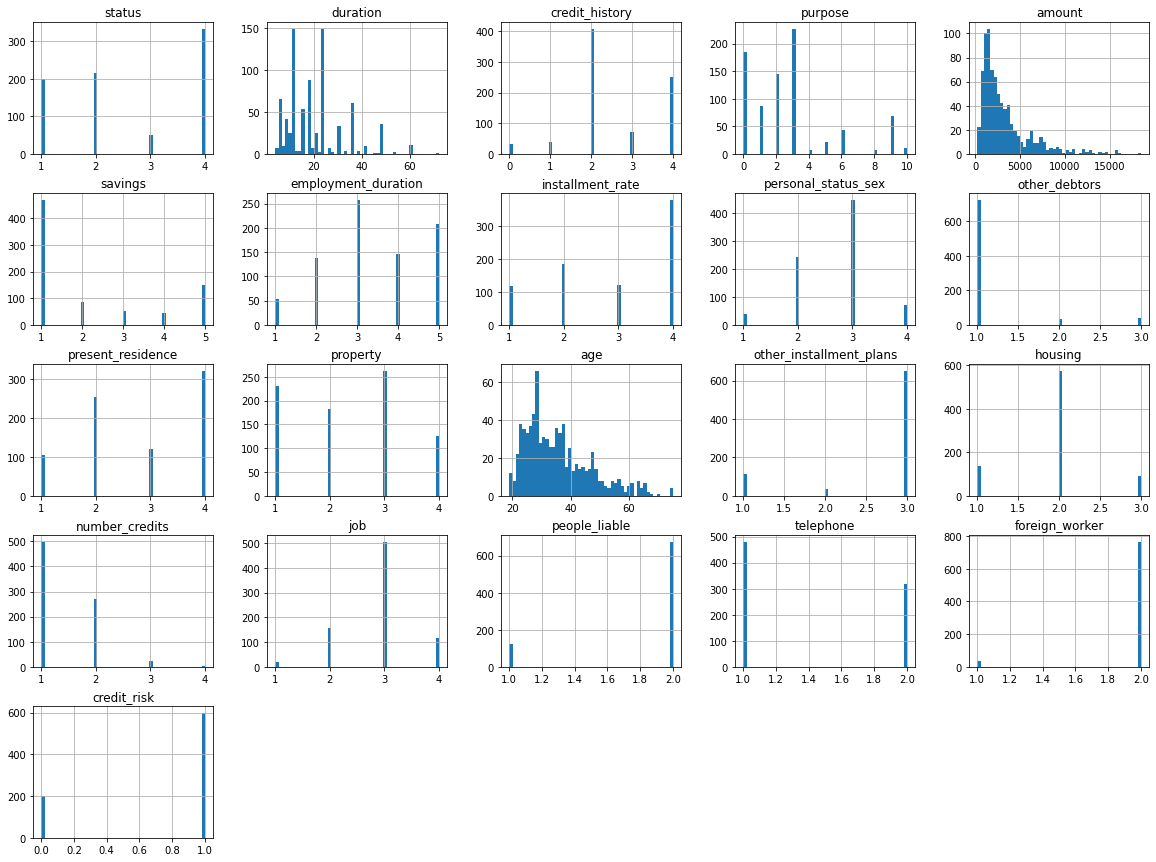

In [7]:
df.hist(bins=50, figsize=(20,15))

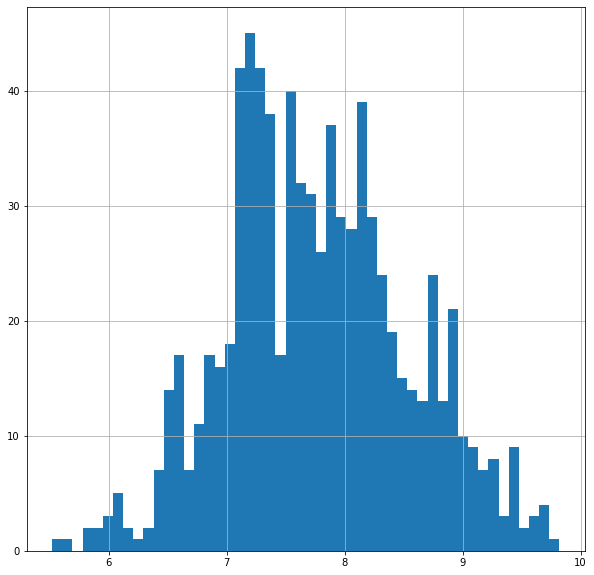

In [8]:
df['log_amount'] = [np.log(x) for x in df['amount']]
df['log_amount'].hist(bins = 50,figsize=(10,10))

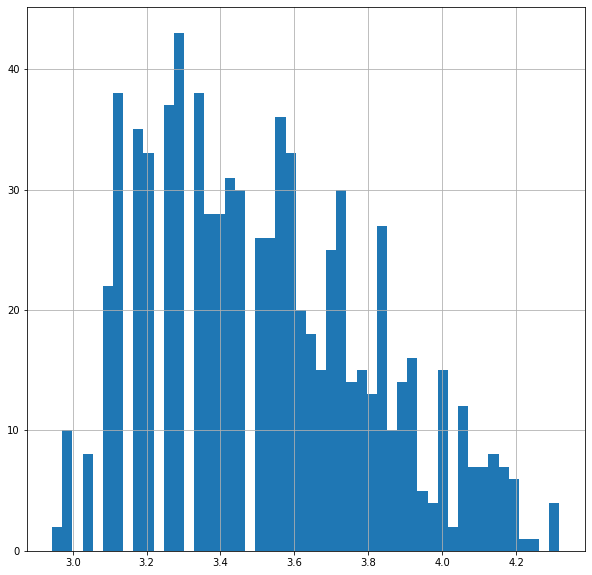

In [9]:
df['log_age'] = [np.log(x) for x in df['age']]
df['log_age'].hist(bins = 50,figsize=(10,10))

In [11]:
# Applying Windsorization to age variable
def winsorize(df, variable):
  upper_limit = df[variable].quantile(0.95)
  lower_limit = df[variable].quantile(0.05)
  return np.where(df[variable] > upper_limit, upper_limit,np.where(df[variable] < lower_limit, lower_limit, df[variable]))


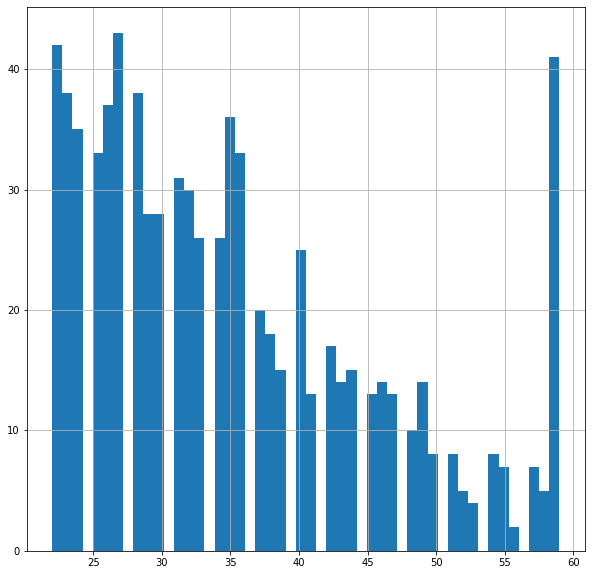

In [12]:
# creating the variable w_age created using windsorization
df['w_age']= winsorize(df, 'age')
df['w_age'].hist(bins = 50,figsize=(10,10))

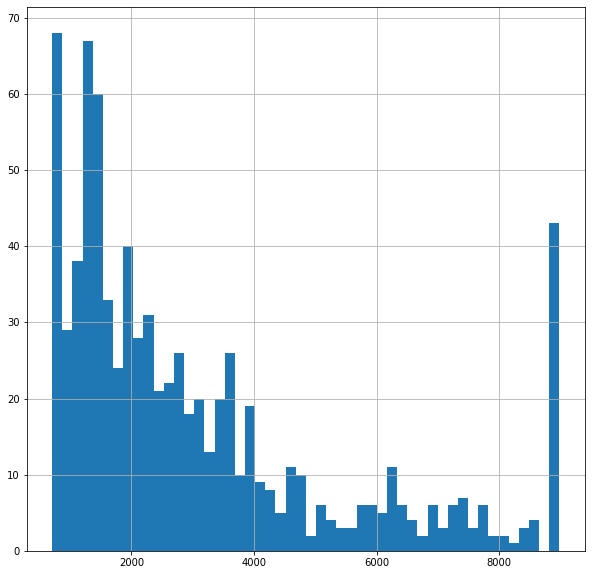

In [13]:
# creating the variable w_amount created using windsorization
df['w_amount']= winsorize(df, 'amount')
df['w_amount'].hist(bins = 50,figsize=(10,10))

In [14]:
# Using the IQR to deal with the outliers on age variable
def iqr(df, variable):
  lb = []
  ub = []
  q1, q3 = np.percentile(df[variable], [25, 75])
  iqr = q3 - q1
  lower_bound = q1 - (iqr * 1.5)
  upper_bound = q3 + (iqr * 1.5)
  for x in df[variable]:
    if x <= lower_bound:
      lb.append(x)
    if x >= upper_bound:
      ub.append(x)
  return lb, ub, lower_bound, upper_bound 

In [15]:
# Using Z Score for outlier detection
def z_score(df, variable):
  LB = []
  UB = []
  uper_bound = df[variable].mean() + 3*df[variable].std()
  lower_bound = df[variable].mean() - 3*df[variable].std()
  for x in df[variable]:
    if x <= lower_bound:
      LB.append(x)
    if x >= uper_bound:
      UB.append(x)
  return LB, UB, lower_bound, uper_bound 

In [16]:
# creating variable using iqr and z_score
def capping(df, variable, lower_limit, upper_limit ):
  return np.where(df[variable] > upper_limit, upper_limit, np.where(df[variable] < lower_limit, lower_limit, df[variable]))

In [17]:
def box_plot(df, variable):
  if df[variable].dtypes == object:
    df[variable] = pd.to_numeric(df[variable],errors = 'coerce')
  plt.figure(figsize=(10,4))
  sns.boxplot(df[variable])
  plt.show()

In [18]:
# Verifying if the newly cerated variable w_age has outliers using iqr score
lb, ub, x, z = iqr(df, 'log_age')
lb, ub, x, z

([], [], 2.63308773758577, 4.400418746701927)

In [19]:
# Verifying if the newly cerated variable w_age has outliers using z score
lb, ub, x, z = z_score(df, 'log_age')
lb, ub, x, z

([], [], 2.6394038098025163, 4.411875568301057)

In [20]:
# applying capping with z score and iqr
lb, ub, x, z = iqr(df, 'age')
df['iqr_age'] = capping(df, 'age', x, z)

In [21]:
lb, ub, x, z = z_score(df, 'age')
df['z_age'] = capping(df, 'age', x, z)

In [22]:
lb, ub, x, z = z_score(df, 'amount')
df['z_amount'] = capping(df, 'amount', x, z)

In [23]:
# applying capping with z score and iqr
lb, ub, x, z = iqr(df, 'amount')
df['iqr_amount'] = capping(df, 'amount', x, z)

In [49]:
lb, ub, x, z = z_score(df, 'iqr_age')
lb, ub

([], [])

In [48]:
lb, ub, x, z = iqr(df, 'iqr_age')
lb, ub

([],
 [64.5,
  64.5,
  64.5,
  64.5,
  64.5,
  64.5,
  64.5,
  64.5,
  64.5,
  64.5,
  64.5,
  64.5,
  64.5,
  64.5,
  64.5])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


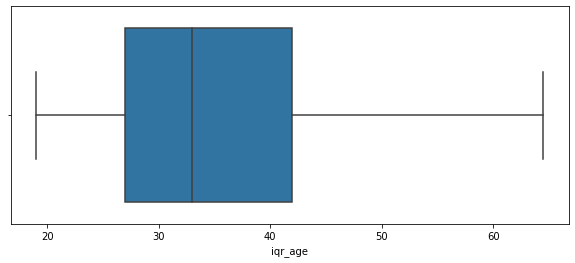

In [47]:
box_plot(df,'iqr_age')

In [25]:
df.head(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,log_amount,log_age,w_age,w_amount,iqr_age,z_age,z_amount,iqr_amount
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1,6.955593,3.044522,22.0,1049.0,21.0,21.0,1049.0,1049.0
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1,7.937017,3.583519,36.0,2799.0,36.0,36.0,2799.0,2799.0
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1,6.734592,3.135494,23.0,841.0,23.0,23.0,841.0,841.0
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1,7.660114,3.663562,39.0,2122.0,39.0,39.0,2122.0,2122.0
4,1,10,4,0,2241,1,2,1,3,1,3,1,48,3,1,2,2,1,1,1,1,7.714677,3.871201,48.0,2241.0,48.0,48.0,2241.0,2241.0


In [53]:
df['iqr_age'].min()

19.0

In [ ]:
# Use log_amount for amount and iqr_age for age.


In [ ]:
# dealing with variable purpose by doing the folowing mapping:
# 0 --> 8, 1 --> [1, 2], 2 --> [3, 4, 5, 6], 4 --> [7, 9], 5 --> 10
#df1 = df.copy()
mapping = {
8: 0,
9: 4,
10: 5,
6: 2,
7: 4,
8: 5,
2: 1,
5: 2,
3:2,
0:0,
1:1,
2:1,
4:4
}

df.loc[:, "purpose"] = df.purpose.map(mapping)

In [ ]:
# Before creating the dummy variables let us copy this dataframe and save it as csv
#df.to_csv('train_1.csv')
df1 = df.copy()
DF = df.copy()
# transform the purpose columns to object and then get the dummy variables
DF = pd.get_dummies(DF, prefix='purpose', columns = ['purpose'])

# Data Processing and Train and Test Separation

In [75]:
#Copy original Dataframe
Df = data.copy()

In [76]:
Df.head()

,id,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,5,1,10,4,0,2241,1,2,1,3,1,3,1,48,3,1,2,2,1,1,1,1


In [77]:
#Function to process the data
def p_process(data):
  df = data.copy()
  
  df['log_amount'] = [np.log(x) for x in df['amount']]
  lb, ub, x, z = iqr(df, 'age')
  df['iqr_age'] = capping(df, 'age', x, z)
  df.drop(['amount', 'age'], axis = 1, inplace= True)

  return df



In [78]:
X = Df.drop(['credit_risk', 'id'], axis =1)
y = Df['credit_risk']
X.shape, y.shape


((800, 20), (800,))

In [79]:
# Divide in train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify = y)

In [80]:
# Verify if classes are balanced
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [200 600]
Labels counts in y_train: [140 420]
Labels counts in y_test: [ 60 180]


In [ ]:
X_test.hist(bins=50, figsize=(20,15))

In [81]:
# Apply transformation funtion to both test and train function
X_train = p_process(X_train)
X_test = p_process(X_test)


In [83]:
X_test.head()

,status,duration,credit_history,purpose,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,log_amount,iqr_age
749,1,21,3,6,1,2,2,3,1,1,2,2,2,2,3,2,1,2,8.135640,26.0
364,4,27,3,9,1,4,3,3,1,4,3,3,2,2,3,2,1,2,8.540324,26.0
721,3,9,0,3,1,2,4,3,1,2,3,3,2,2,4,2,2,2,7.198184,34.0
402,4,18,4,2,1,2,3,1,1,2,3,3,2,2,4,2,2,2,8.237479,35.0
283,4,30,4,3,5,5,3,3,1,2,3,3,2,2,3,1,2,2,8.031710,40.0


In [85]:
# Apply Robust Scaler to both train and test data
stdsc = RobustScaler()
X_std_r = stdsc.fit_transform(X_train)
X_test_std_r = stdsc.transform(X_test)



# Aplicação de diversos modelos

In [89]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score

rstate = 79

def CheckModels(dfX, dfY, dfx, dfy):
    
    LModels = ["RandomForest", "GBoosting", "SVC", "LogisticRegression", "DecisionTreeClassifier", "knn"]

    for Classifier in LModels:
        ## Model training
        if Classifier=="RandomForest":
            rf = RandomForestClassifier(random_state=rstate)
            rf.fit(dfX, dfY)
            y_pred_rf = rf.predict(dfx)
        if Classifier=="SVC":       
            svc= SVC(kernel='rbf', C=1.0, random_state=rstate, gamma = 0.2)
            svc.fit(dfX, dfY)
            y_pred_svc = svc.predict(dfx)
        if Classifier=="GBoosting":
            xgb = GradientBoostingClassifier(random_state=rstate)
            xgb.fit(dfX, dfY)
            y_pred_xgb = xgb.predict(dfx)
        if Classifier=="LogisticRegression":
            lr = LogisticRegression(random_state=rstate)
            lr.fit(dfX, dfY)
            y_pred_lr = lr.predict(dfx)
        if Classifier== "DecisionTreeClassifier":
            tree = DecisionTreeClassifier(random_state= rstate)
            tree.fit(dfX, dfY)
            y_pred_t = tree.predict(dfx)
        if Classifier== "knn":
            knn = KNeighborsClassifier(n_neighbors=6)
            knn.fit(dfX, dfY)
            y_pred_knn = knn.predict(dfx)
        
    predictors = [y_pred_rf,  y_pred_svc, y_pred_xgb, y_pred_lr, y_pred_t, y_pred_knn]
        
    for y, x in zip(predictors, LModels) :
      acc = accuracy_score(dfy, y)
      wf1 = f1_score(dfy, y, average='weighted')
      roc = roc_auc_score(dfy, y)
      
      print(f"Accurary for model {x} is = {acc:.3f}")      
      print(f"roc for model {x} is = {roc:.3f}")
      print(f"f1_score for model {x} is = {wf1:.3f}")
      print('------------------------------------------')
        

In [90]:
CheckModels(X_std_r, y_train, X_test_std_r, y_test)

Accurary for model RandomForest is = 0.762
roc for model RandomForest is = 0.614
f1_score for model RandomForest is = 0.739
------------------------------------------
Accurary for model GBoosting is = 0.762
roc for model GBoosting is = 0.569
f1_score for model GBoosting is = 0.713
------------------------------------------
Accurary for model SVC is = 0.775
roc for model SVC is = 0.633
f1_score for model SVC is = 0.754
------------------------------------------
Accurary for model LogisticRegression is = 0.725
roc for model LogisticRegression is = 0.583
f1_score for model LogisticRegression is = 0.707
------------------------------------------
Accurary for model DecisionTreeClassifier is = 0.667
roc for model DecisionTreeClassifier is = 0.561
f1_score for model DecisionTreeClassifier is = 0.668
------------------------------------------
Accurary for model knn is = 0.762
roc for model knn is = 0.603
f1_score for model knn is = 0.734
------------------------------------------


# Hyperparameter Optimization with Cross Validation

# PCA to data

# 2. Target Definition

## 2.1 Criar conjunto de treino e de teste

### Normalize the data


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

### Standardize the data

In [ ]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

### Robust Scaler

In [ ]:
from sklearn.preprocessing import RobustScaler
stdsc = RobustScaler()
X_train_std_r = stdsc.fit_transform(X_train)
X_test_std_r = stdsc.transform(X_test)

In [ ]:
X_train_std_1 = stdsc.fit_transform(X_train1)
X_test_std_1 = stdsc.transform(X_test1)

# Aplicação dos Modelos

In [ ]:
def plot_confusion_matrix(y_test, y_pred):    
    # get confusion matrix from sklearn
    cm =confusion_matrix(y_test, y_pred)
    # plot using matplotlib and seaborn
    plt.figure(figsize=(10, 10))
    cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0,
    as_cmap=True)
    sns.set(font_scale=2.5)
    sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)

In [ ]:
CheckModels(X_train_std , y_train, X_test_std, y_test)

Accurary for model RandomForest is = 0.950
roc for model RandomForest is = 0.911
f1_score for model RandomForest is = 0.949
------------------------------------------
Accurary for model GBoosting is = 0.779
roc for model GBoosting is = 0.569
f1_score for model GBoosting is = 0.716
------------------------------------------
Accurary for model SVC is = 0.971
roc for model SVC is = 0.942
f1_score for model SVC is = 0.970
------------------------------------------
Accurary for model LogisticRegression is = 0.904
roc for model LogisticRegression is = 0.864
f1_score for model LogisticRegression is = 0.903
------------------------------------------
Accurary for model DecisionTreeClassifier is = 0.950
roc for model DecisionTreeClassifier is = 0.928
f1_score for model DecisionTreeClassifier is = 0.950
------------------------------------------
Accurary for model knn is = 0.829
roc for model knn is = 0.753
f1_score for model knn is = 0.826
------------------------------------------


In [ ]:
CheckModels(X_train_norm , y_train, X_test_norm, y_test)

Accurary for model RandomForest is = 0.950
roc for model RandomForest is = 0.911
f1_score for model RandomForest is = 0.949
------------------------------------------
Accurary for model GBoosting is = 0.875
roc for model GBoosting is = 0.817
f1_score for model GBoosting is = 0.873
------------------------------------------
Accurary for model SVC is = 0.971
roc for model SVC is = 0.942
f1_score for model SVC is = 0.970
------------------------------------------
Accurary for model LogisticRegression is = 0.883
roc for model LogisticRegression is = 0.822
f1_score for model LogisticRegression is = 0.880
------------------------------------------
Accurary for model DecisionTreeClassifier is = 0.950
roc for model DecisionTreeClassifier is = 0.928
f1_score for model DecisionTreeClassifier is = 0.950
------------------------------------------
Accurary for model knn is = 0.817
roc for model knn is = 0.733
f1_score for model knn is = 0.812
------------------------------------------


In [ ]:
CheckModels(X_train_std_r , y_train, X_test_std_r, y_test)

Accurary for model RandomForest is = 0.954
roc for model RandomForest is = 0.914
f1_score for model RandomForest is = 0.953
------------------------------------------
Accurary for model GBoosting is = 0.858
roc for model GBoosting is = 0.772
f1_score for model GBoosting is = 0.852
------------------------------------------
Accurary for model SVC is = 0.971
roc for model SVC is = 0.942
f1_score for model SVC is = 0.970
------------------------------------------
Accurary for model LogisticRegression is = 0.904
roc for model LogisticRegression is = 0.864
f1_score for model LogisticRegression is = 0.903
------------------------------------------
Accurary for model DecisionTreeClassifier is = 0.950
roc for model DecisionTreeClassifier is = 0.928
f1_score for model DecisionTreeClassifier is = 0.950
------------------------------------------
Accurary for model knn is = 0.812
roc for model knn is = 0.703
f1_score for model knn is = 0.801
------------------------------------------


In [ ]:
CheckModels(X_train_std_1 , y_train1, X_test_std_1, y_test1)

Accurary for model RandomForest is = 0.950
f1_score for model RandomForest is = 0.949
------------------------------------------
Accurary for model GBoosting is = 0.854
f1_score for model GBoosting is = 0.848
------------------------------------------
Accurary for model SVC is = 0.975
f1_score for model SVC is = 0.975
------------------------------------------
Accurary for model LogisticRegression is = 0.904
f1_score for model LogisticRegression is = 0.903
------------------------------------------
Accurary for model DecisionTreeClassifier is = 0.942
f1_score for model DecisionTreeClassifier is = 0.942
------------------------------------------
Accurary for model knn is = 0.812
f1_score for model knn is = 0.801
------------------------------------------


## Hyperparameter Tunning

In [ ]:
def TuneModels(dfX, dfY, dfx, dfy):
    
    LModels = ["RandomForest", "GBoosting", "SVC", "LogisticRegression", "DecisionTreeClassifier", "knn"]

    for Classifier in LModels:
        ## Model training
        if Classifier=="RandomForest":
            rf = RandomForestClassifier(random_state=rstate)
            rf.fit(dfX, dfY)
            y_pred_rf = rf.predict(dfx)
        if Classifier=="SVC":       
            svc= SVC(kernel='rbf', C=1.0, random_state=rstate, gamma = 0.2)
            svc.fit(dfX, dfY)
            y_pred_svc = svc.predict(dfx)
        if Classifier=="GBoosting":
            xgb = GradientBoostingClassifier(random_state=rstate)
            xgb.fit(dfX, dfY)
            y_pred_xgb = xgb.predict(dfx)
        if Classifier=="LogisticRegression":
            lr = LogisticRegression(random_state=rstate)
            lr.fit(dfX, dfY)
            y_pred_lr = lr.predict(dfx)
        if Classifier== "DecisionTreeClassifier":
            tree = DecisionTreeClassifier(random_state= rstate)
            tree.fit(dfX, dfY)
            y_pred_t = tree.predict(dfx)
        if Classifier== "knn":
            knn = KNeighborsClassifier(n_neighbors=6)
            knn.fit(dfX, dfY)
            y_pred_knn = knn.predict(dfx)
        
    predictors = [y_pred_rf,  y_pred_svc, y_pred_xgb, y_pred_lr, y_pred_t, y_pred_knn]
        
    for y, x in zip(predictors, LModels) :
      acc = accuracy_score(dfy, y)
      wf1 = f1_score(dfy, y, average='weighted')
      roc = roc_auc_score(dfy, y)
      
      print(f"Accurary for model {x} is = {acc:.3f}")      
      print(f"roc for model {x} is = {roc:.3f}")
      print(f"f1_score for model {x} is = {wf1:.3f}")
      print('------------------------------------------')